In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import tensorflow as tf

In [2]:
path=r"C:\Users\SHIHANA\Downloads\Classification\Classification\JPEGImages"
files=os.listdir(path)
print(files)

['levle0_0.jpg', 'levle0_1.jpg', 'levle0_10.jpg', 'levle0_100.jpg', 'levle0_101.jpg', 'levle0_102.jpg', 'levle0_103.jpg', 'levle0_104.jpg', 'levle0_105.jpg', 'levle0_106.jpg', 'levle0_107.jpg', 'levle0_108.jpg', 'levle0_109.jpg', 'levle0_11.jpg', 'levle0_110.jpg', 'levle0_111.jpg', 'levle0_112.jpg', 'levle0_113.jpg', 'levle0_114.jpg', 'levle0_115.jpg', 'levle0_116.jpg', 'levle0_117.jpg', 'levle0_118.jpg', 'levle0_119.jpg', 'levle0_12.jpg', 'levle0_120.jpg', 'levle0_121.jpg', 'levle0_122.jpg', 'levle0_123.jpg', 'levle0_124.jpg', 'levle0_125.jpg', 'levle0_126.jpg', 'levle0_127.jpg', 'levle0_128.jpg', 'levle0_129.jpg', 'levle0_130.jpg', 'levle0_131.jpg', 'levle0_132.jpg', 'levle0_133.jpg', 'levle0_134.jpg', 'levle0_135.jpg', 'levle0_136.jpg', 'levle0_137.jpg', 'levle0_138.jpg', 'levle0_139.jpg', 'levle0_14.jpg', 'levle0_140.jpg', 'levle0_141.jpg', 'levle0_142.jpg', 'levle0_143.jpg', 'levle0_144.jpg', 'levle0_145.jpg', 'levle0_146.jpg', 'levle0_147.jpg', 'levle0_148.jpg', 'levle0_149.jpg',

In [3]:
print(f"Total images:{len(files)}")

Total images:1457


In [4]:
def preprocess(file_path,target_size=(224,224)):
    image=cv2.imread(file_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,target_size)
    image=image/255.0
    return image

In [5]:
data=ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [6]:
def enhance(image):
    lab=cv2.cvtColor((image*255).astype(np.uint8),cv2.COLOR_RGB2LAB)
    l,a,b=cv2.split(lab)
    clahe=cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
    cl=clahe.apply(l)
    l_img=cv2.merge((cl,a,b))
    enhanced=cv2.cvtColor(l_img,cv2.COLOR_LAB2RGB)
    return enhanced/255.0

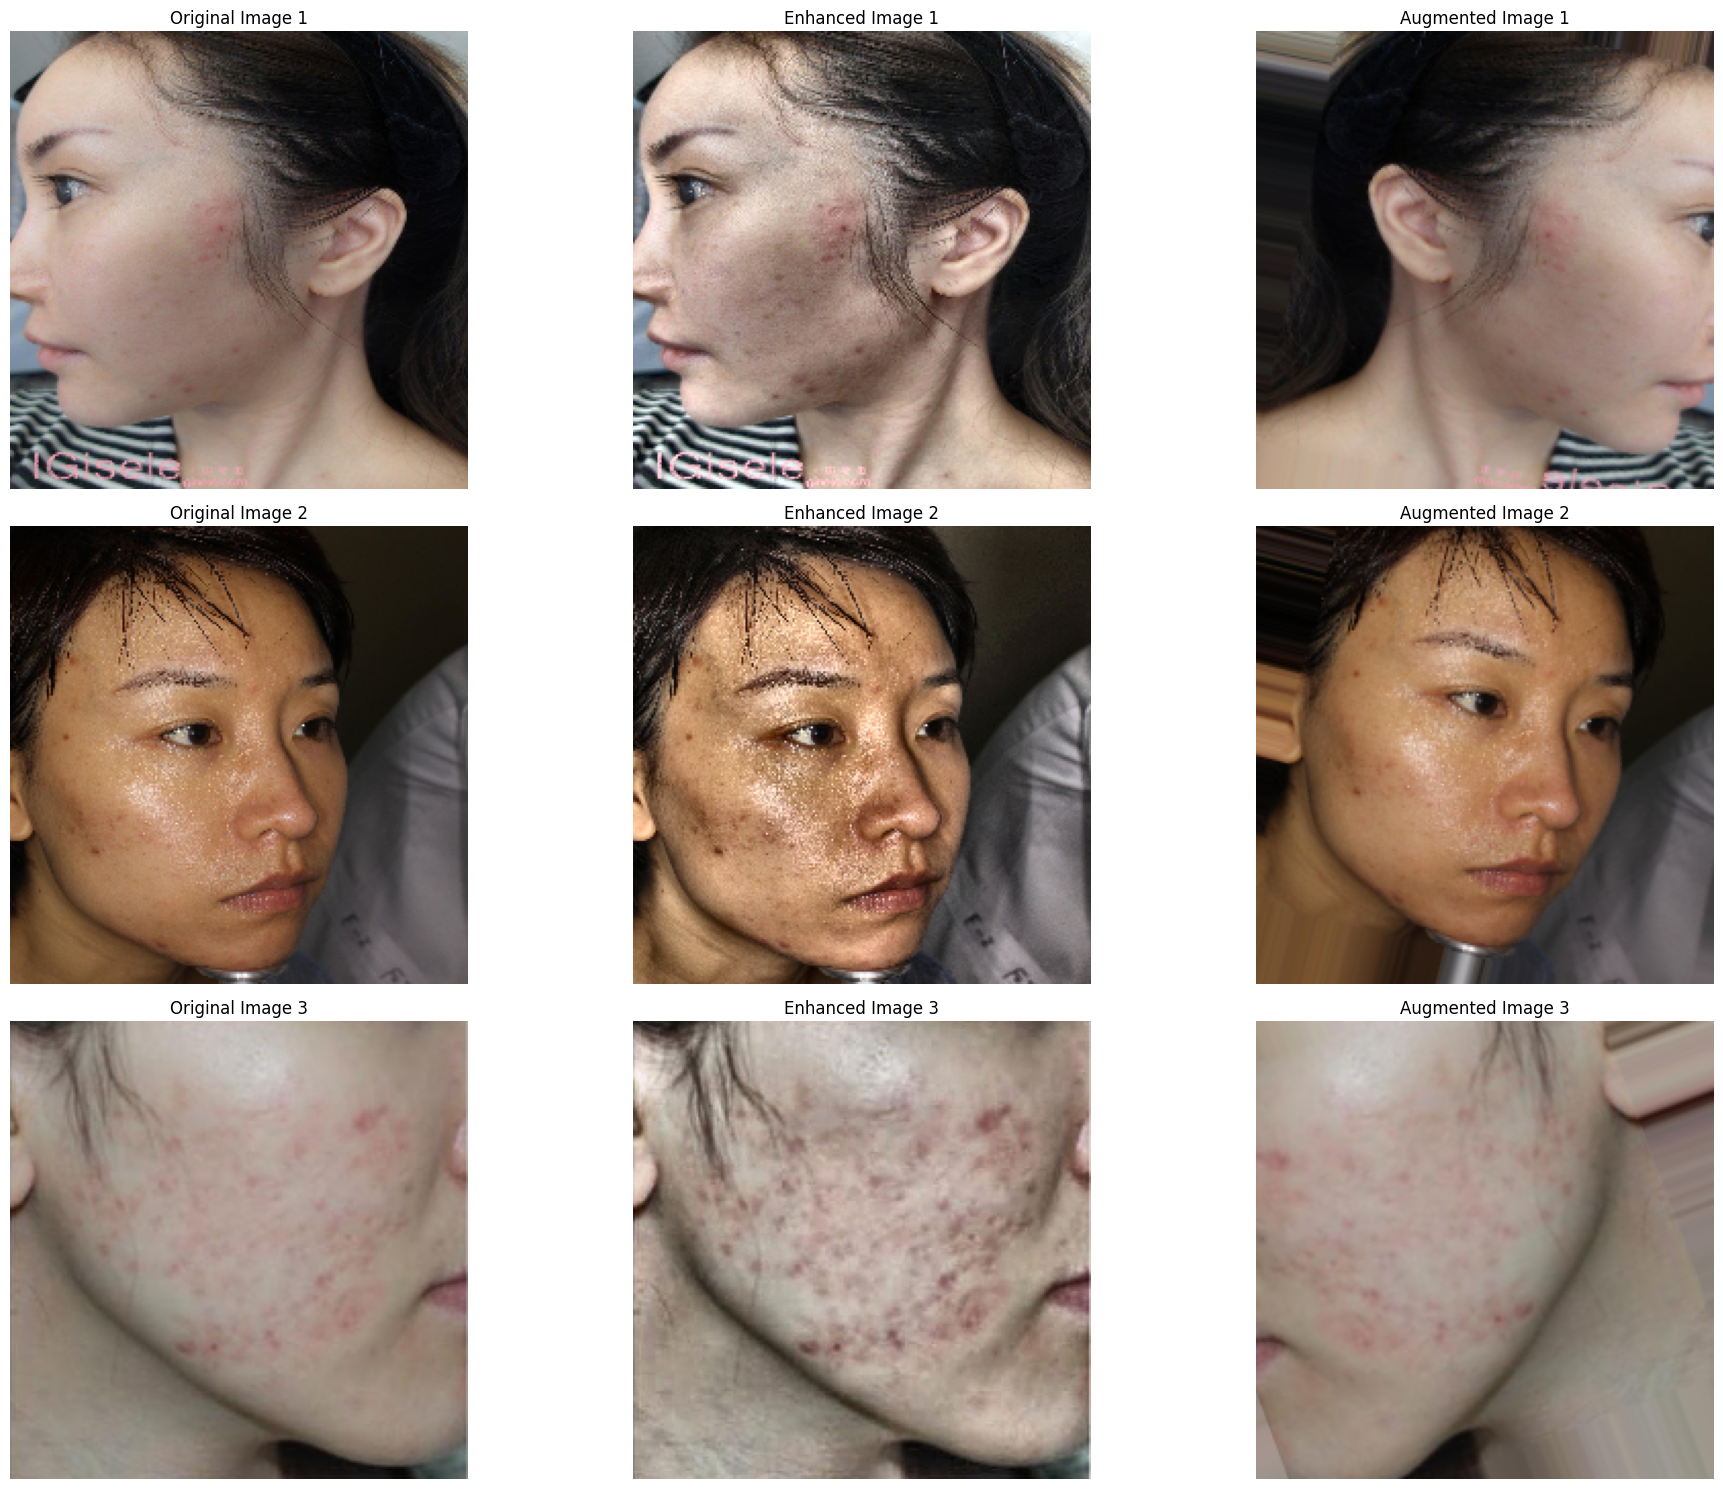

Processed image shape: (224, 224, 3)


In [7]:
num=3
plt.figure(figsize=(20,5*num))

for i,file in enumerate(files[:num]):
    file_path=os.path.join(path, file)
    
    original_img=preprocess(file_path)
    
    enhanced_img=enhance(original_img)
    
    augmented_img=data.random_transform(original_img)
    
    plt.subplot(num,3,3*i+1)
    plt.imshow(original_img)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')
    
    plt.subplot(num,3,3*i+2)
    plt.imshow(enhanced_img)
    plt.title(f"Enhanced Image {i+1}")
    plt.axis('off')
    
    plt.subplot(num,3,3*i+3)
    plt.imshow(augmented_img)
    plt.title(f"Augmented Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Shape of preproceesed image:{original_img.shape}")